In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('add_community.csv')
df.head()

,FID,Join_Count,TARGET_FID,Field1,index,CMPLNT_NUM,CMPLNT_FR_,CMPLNT_FR1,OFNS_DESC,BORO_NM,...,Y_COORD_CD,Latitude,Longitude,Lat_Lon,hour,weekday,datetime,BoroCD,Shape_Leng,Shape_Area
0,0,1,0,0,313,846207268,2017/12/31 0:00,2000/12/30 0:00,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,...,176742,40.651800,-74.012345,"(40.651800177, -74.01234462)",12,SUNDAY,2017/12/31 0:00,307,87424.46794,1.041419e+08
1,1,1,1,1,553,764775390,2017/12/31 0:00,NaN,GRAND LARCENY,BRONX,...,238742,40.821953,-73.928094,"(40.821953065, -73.928094285)",1,SUNDAY,2017/12/31 0:00,204,31291.32691,5.553380e+07
2,2,1,2,2,1141,565589334,2017/12/30 0:00,NaN,ROBBERY,MANHATTAN,...,201914,40.720892,-73.988818,"(40.720891684, -73.988817939)",15,SATURDAY,2017/12/30 0:00,103,30468.36769,4.687934e+07
3,3,1,3,3,1165,610989528,2017/12/30 0:00,NaN,PETIT LARCENY,MANHATTAN,...,212676,40.750431,-73.989282,"(40.750430768, -73.989282176)",14,SATURDAY,2017/12/30 0:00,105,35288.30488,4.379030e+07
4,4,1,4,4,1167,695114551,2017/12/30 0:00,NaN,VEHICLE AND TRAFFIC LAWS,QUEENS,...,193793,40.698443,-73.808546,"(40.698442771, -73.808546403)",14,SATURDAY,2017/12/30 0:00,412,65928.41098,2.673333e+08


df = df[(df['BoroCD'] == 404) | (df['BoroCD'] == 405) | (df['BoroCD'] == 406) | (df['BoroCD'] == 407) | (df['BoroCD'] == 409)]

In [3]:
df.shape

(449214, 21)

df.to_csv('queens_AD.csv')

In [4]:
df.columns

Index([u'FID', u'Join_Count', u'TARGET_FID', u'Field1', u'index',
       u'CMPLNT_NUM', u'CMPLNT_FR_', u'CMPLNT_FR1', u'OFNS_DESC', u'BORO_NM',
       u'X_COORD_CD', u'Y_COORD_CD', u'Latitude', u'Longitude', u'Lat_Lon',
       u'hour', u'weekday', u'datetime', u'BoroCD', u'Shape_Leng',
       u'Shape_Area'],
      dtype='object')

In [5]:
df = df[['OFNS_DESC','hour','weekday','BoroCD']]
df.head()

,OFNS_DESC,hour,weekday,BoroCD
0,ASSAULT 3 & RELATED OFFENSES,12,SUNDAY,307
1,GRAND LARCENY,1,SUNDAY,204
2,ROBBERY,15,SATURDAY,103
3,PETIT LARCENY,14,SATURDAY,105
4,VEHICLE AND TRAFFIC LAWS,14,SATURDAY,412


In [6]:
df.columns = [['crime','hour','weekday','community']]
df.head()

,crime,hour,weekday,community
0,ASSAULT 3 & RELATED OFFENSES,12,SUNDAY,307
1,GRAND LARCENY,1,SUNDAY,204
2,ROBBERY,15,SATURDAY,103
3,PETIT LARCENY,14,SATURDAY,105
4,VEHICLE AND TRAFFIC LAWS,14,SATURDAY,412


In [7]:
df.shape

(449214, 4)

In [8]:
que = pd.read_csv('queens_cluster.csv')
del que[que.columns[0]]
que = que[['community','labels']]
que = que[que['labels'] == 1]
que = que.reset_index(drop=True)
que

,community,labels
0,404,1
1,405,1
2,406,1
3,407,1
4,409,1


In [9]:
df = df[(df['community'] == 404) | (df['community'] == 405) | (df['community'] == 406) | (df['community'] == 407) | (df['community'] == 409)]

In [10]:
df = df.reset_index(drop=True)

In [11]:
df.community.unique()

array([407, 404, 409, 406, 405])

In [12]:
df.head()

,crime,hour,weekday,community
0,PETIT LARCENY,12,SATURDAY,407
1,ASSAULT 3 & RELATED OFFENSES,9,SATURDAY,404
2,HARRASSMENT 2,9,SATURDAY,407
3,INTOXICATED & IMPAIRED DRIVING,9,SATURDAY,407
4,ASSAULT 3 & RELATED OFFENSES,8,SATURDAY,409


In [13]:
df.shape

(27191, 4)

In [14]:
len(df.crime.unique())

46

In [15]:
27000/46

586

In [16]:
filter = df.groupby('crime').count()
filter = filter[filter['hour'] > 150]
filter.head()

,hour,weekday,community
crime,,,
ASSAULT 3 & RELATED OFFENSES,3136,3136,3136
BURGLARY,973,973,973
CRIMINAL MISCHIEF & RELATED OF,3452,3452,3452
CRIMINAL TRESPASS,225,225,225
DANGEROUS DRUGS,289,289,289


In [17]:
df = df[df['crime'].isin(filter.index.unique())]

In [18]:
df = df.reset_index(drop=True)

## Calculate percent of hour

In [26]:
df1 = df[['crime','hour']]

In [27]:
data1 = df1[df1['crime'] == df1['crime'].unique()[0]].groupby('hour').count().T
data1.index = range(0,1)
data1.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,135,95,89,85,65,67,72,99,192,218,...,438,469,450,474,470,376,370,282,196,157


In [28]:
for i in range(1,len(df1['crime'].unique())):
    DATA = df1[df1['crime'] == df1['crime'].unique()[i]].groupby('hour').count().T
    DATA.index = range(i,i+1)
    data1 = pd.concat([data1,DATA])

In [29]:
data1.index = df1['crime'].unique()

In [30]:
data1.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
PETIT LARCENY,135,95,89.0,85,65,67,72,99.0,192,218,...,438,469,450,474,470,376,370,282,196,157
ASSAULT 3 & RELATED OFFENSES,165,156,155.0,135,162,85,52,77.0,77,77,...,135,147,142,152,165,157,179,164,176,188
HARRASSMENT 2,117,93,80.0,61,41,48,66,94.0,169,193,...,270,285,243,266,253,258,287,207,219,184
INTOXICATED & IMPAIRED DRIVING,24,34,34.0,38,48,34,7,3.0,6,2,...,8,4,2,4,4,10,17,13,24,20
OFFENSES AGAINST PUBLIC ADMINI,7,11,7.0,5,7,8,6,8.0,10,5,...,14,12,13,13,16,7,8,14,11,10


In [31]:
data1.shape

(19, 24)

In [32]:
data1['sum'] = data1[data1.columns[0]]

for i in range(19):
    data1.iloc[i,-1] = data1.iloc[i,:-1].sum()
    
for i in range(19):
    for j in range(24):
        data1.iloc[i,j] = data1.iloc[i,j] / data1.iloc[i,-1]       
        
data1 = data1.iloc[:,:-1]

data1.columns = 'hour_' + data1.columns.map(str)

hour = data1.copy()

hour.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
PETIT LARCENY,0.022030,0.015503,0.014523,0.013871,0.010607,0.010933,0.011749,0.016155,0.031332,0.035574,...,0.071475,0.076534,0.073433,0.077350,0.076697,0.061358,0.060379,0.046018,0.031984,0.025620
ASSAULT 3 & RELATED OFFENSES,0.052615,0.049745,0.049426,0.043048,0.051658,0.027105,0.016582,0.024554,0.024554,0.024554,...,0.043048,0.046875,0.045281,0.048469,0.052615,0.050064,0.057079,0.052296,0.056122,0.059949
HARRASSMENT 2,0.027484,0.021846,0.018793,0.014329,0.009631,0.011276,0.015504,0.022081,0.039699,0.045337,...,0.063425,0.066949,0.057082,0.062485,0.059432,0.060606,0.067418,0.048626,0.051445,0.043223
INTOXICATED & IMPAIRED DRIVING,0.069164,0.097983,0.097983,0.109510,0.138329,0.097983,0.020173,0.008646,0.017291,0.005764,...,0.023055,0.011527,0.005764,0.011527,0.011527,0.028818,0.048991,0.037464,0.069164,0.057637
OFFENSES AGAINST PUBLIC ADMINI,0.030568,0.048035,0.030568,0.021834,0.030568,0.034934,0.026201,0.034934,0.043668,0.021834,...,0.061135,0.052402,0.056769,0.056769,0.069869,0.030568,0.034934,0.061135,0.048035,0.043668


In [33]:
hour = hour.fillna(0)

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
x = hour[[x for x in hour.columns if 'hour' in x]]
score = {}
for i in range(2,10):
    km = KMeans(random_state=999,n_clusters=i)
    res=km.fit(x)
    labels = res.labels_
    score[i] = silhouette_score(x, labels)
    print("For n_clusters = {},".format(i)+" the silhouette_score is : {}".format(score[i]))
print('The choosen number of clusters is {}'.format([n for n in score.keys() if score[n]==max(score.values())][0]))

For n_clusters = 2, the silhouette_score is : 0.249497316262
For n_clusters = 3, the silhouette_score is : 0.258314180241
For n_clusters = 4, the silhouette_score is : 0.247867854577
For n_clusters = 5, the silhouette_score is : 0.20343123325
For n_clusters = 6, the silhouette_score is : 0.120297175849
For n_clusters = 7, the silhouette_score is : 0.127455161588
For n_clusters = 8, the silhouette_score is : 0.152489663935
For n_clusters = 9, the silhouette_score is : 0.13950116908
The choosen number of clusters is 3


In [35]:
from sklearn.cluster import KMeans
km = KMeans(random_state=999,n_clusters=3)
res=km.fit(hour[[x for x in hour.columns if 'hour' in x]])

print 'Cluster assignments:',res.labels_
print '\nCluster centers:\n',res.cluster_centers_
print '\nSum of squared errors:',res.inertia_

Cluster assignments: [2 0 2 0 2 0 2 0 0 0 2 1 2 2 0 2 2 2 0]

Cluster centers:
[[ 0.06598892  0.06363156  0.04787538  0.049786    0.05289134  0.02997982
   0.02199585  0.01389914  0.02136872  0.0181552   0.01994867  0.02244482
   0.03121263  0.03144706  0.03228541  0.04178505  0.04312031  0.04028182
   0.04853435  0.04992093  0.06516054  0.05626707  0.06983488  0.06218453]
 [ 0.08296943  0.01746725  0.          0.00436681  0.00436681  0.00873362
   0.00873362  0.00873362  0.08733624  0.12227074  0.01310044  0.00873362
   0.21834061  0.04803493  0.04803493  0.09606987  0.05240175  0.04803493
   0.01746725  0.0349345   0.03056769  0.02183406  0.01310044  0.00436681]
 [ 0.03931713  0.03179508  0.02567602  0.01838816  0.02311522  0.01864745
   0.0179472   0.02577538  0.03892316  0.03972712  0.0448247   0.04518608
   0.06017294  0.04252294  0.05454006  0.05669366  0.06132805  0.0672958
   0.05726453  0.05523709  0.05082852  0.04904512  0.03734867  0.03839991]]

Sum of squared errors: 0.0926

In [36]:
crime = hour[[x for x in hour.columns if 'hour' in x]].copy()
crime['labels'] = res.labels_

In [37]:
hr_mean = pd.DataFrame({'hour_{}'.format(x):0 for x in range(0,24)},index=[0,1,2])
hr_mean.columns = sorted(hr_mean.columns,key=lambda x: int(x[5:]))

In [38]:
for i in range(0,3):
    hr_mean.iloc[i] = crime[crime['labels']==i].mean(0)

In [39]:
from matplotlib import pyplot as plt

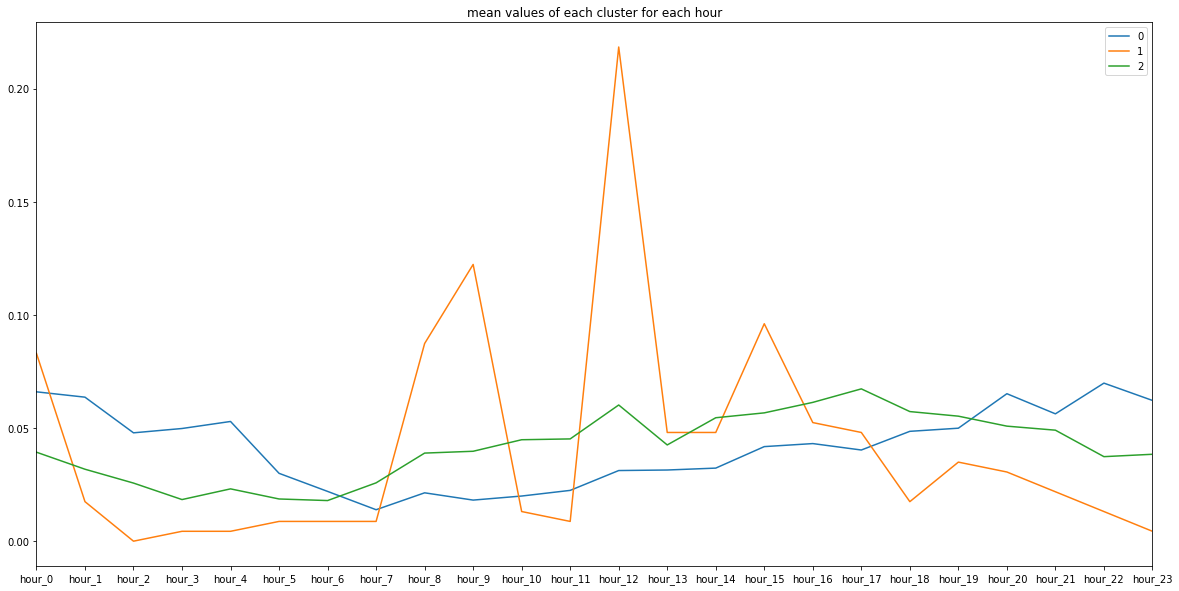

In [40]:
hr_mean.T.plot(figsize=[20,10],xticks=range(24),title='mean values of each cluster for each hour')
plt.show()

In [41]:
crime[crime['labels'] == 0]

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,labels
ASSAULT 3 & RELATED OFFENSES,0.052615,0.049745,0.049426,0.043048,0.051658,0.027105,0.016582,0.024554,0.024554,0.024554,...,0.046875,0.045281,0.048469,0.052615,0.050064,0.057079,0.052296,0.056122,0.059949,0
INTOXICATED & IMPAIRED DRIVING,0.069164,0.097983,0.097983,0.109510,0.138329,0.097983,0.020173,0.008646,0.017291,0.005764,...,0.011527,0.005764,0.011527,0.011527,0.028818,0.048991,0.037464,0.069164,0.057637,0
ROBBERY,0.047205,0.062112,0.044720,0.062112,0.064596,0.034783,0.018634,0.006211,0.016149,0.016149,...,0.045963,0.029814,0.042236,0.050932,0.043478,0.073292,0.063354,0.065839,0.063354,0
FELONY ASSAULT,0.056893,0.052516,0.052516,0.050328,0.044858,0.018600,0.033917,0.028446,0.031729,0.037199,...,0.041575,0.059081,0.029540,0.033917,0.056893,0.070022,0.053611,0.062363,0.055799,0
CRIMINAL MISCHIEF & RELATED OF,0.106025,0.063731,0.030127,0.020857,0.017671,0.018830,0.012746,0.019988,0.026362,0.024044,...,0.043163,0.033314,0.057068,0.053302,0.061993,0.060834,0.067207,0.068366,0.055330,0
GRAND LARCENY OF MOTOR VEHICLE,0.035917,0.039698,0.032136,0.026465,0.026465,0.020794,0.015123,0.018904,0.032136,0.011342,...,0.045369,0.037807,0.043478,0.060491,0.075614,0.105860,0.102079,0.083176,0.056711,0
DANGEROUS DRUGS,0.093426,0.058824,0.044983,0.041522,0.048443,0.017301,0.027682,0.000000,0.013841,0.017301,...,0.055363,0.076125,0.058824,0.058824,0.038062,0.020761,0.051903,0.069204,0.055363,0
DANGEROUS WEAPONS,0.066667,0.084444,0.031111,0.044444,0.031111,0.004444,0.031111,0.004444,0.008889,0.008889,...,0.044444,0.057778,0.031111,0.066667,0.044444,0.084444,0.022222,0.084444,0.093333,0


In [42]:
crime[crime['labels'] == 1]

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,labels
THEFT-FRAUD,0.082969,0.017467,0.0,0.004367,0.004367,0.008734,0.008734,0.008734,0.087336,0.122271,...,0.09607,0.052402,0.048035,0.017467,0.034934,0.030568,0.021834,0.0131,0.004367,1


In [43]:
crime[crime['labels'] == 2]

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,labels
PETIT LARCENY,0.022030,0.015503,0.014523,0.013871,0.010607,0.010933,0.011749,0.016155,0.031332,0.035574,...,0.076534,0.073433,0.077350,0.076697,0.061358,0.060379,0.046018,0.031984,0.025620,2
HARRASSMENT 2,0.027484,0.021846,0.018793,0.014329,0.009631,0.011276,0.015504,0.022081,0.039699,0.045337,...,0.066949,0.057082,0.062485,0.059432,0.060606,0.067418,0.048626,0.051445,0.043223,2
OFFENSES AGAINST PUBLIC ADMINI,0.030568,0.048035,0.030568,0.021834,0.030568,0.034934,0.026201,0.034934,0.043668,0.021834,...,0.052402,0.056769,0.056769,0.069869,0.030568,0.034934,0.061135,0.048035,0.043668,2
GRAND LARCENY,0.070807,0.011594,0.022774,0.015735,0.016977,0.010352,0.007867,0.017391,0.040994,0.057971,...,0.067909,0.054658,0.064596,0.059213,0.054244,0.049275,0.034369,0.031056,0.022774,2
BURGLARY,0.036999,0.031860,0.041110,0.036999,0.026721,0.024666,0.021583,0.039054,0.061665,0.036999,...,0.047276,0.043165,0.051387,0.057554,0.060637,0.041110,0.047276,0.031860,0.031860,2
OFF. AGNST PUB ORD SENSBLTY &,0.042487,0.024870,0.015544,0.011399,0.016580,0.009326,0.014508,0.033161,0.025907,0.043523,...,0.062176,0.066321,0.065285,0.067358,0.059067,0.065285,0.044560,0.026943,0.036269,2
VEHICLE AND TRAFFIC LAWS,0.027842,0.027842,0.025522,0.009281,0.039443,0.051044,0.032483,0.030162,0.044084,0.032483,...,0.064965,0.048724,0.085847,0.083527,0.062645,0.041763,0.032483,0.041763,0.030162,2
MISCELLANEOUS PENAL LAW,0.044632,0.032569,0.019300,0.022919,0.025332,0.022919,0.012063,0.036188,0.044632,0.039807,...,0.044632,0.051870,0.056695,0.045838,0.066345,0.055489,0.045838,0.050663,0.044632,2
FORGERY,0.059211,0.046053,0.019737,0.019737,0.019737,0.006579,0.019737,0.019737,0.039474,0.052632,...,0.026316,0.072368,0.059211,0.013158,0.065789,0.052632,0.072368,0.019737,0.065789,2
CRIMINAL TRESPASS,0.031111,0.057778,0.048889,0.017778,0.035556,0.004444,0.017778,0.008889,0.017778,0.031111,...,0.057778,0.088889,0.093333,0.040000,0.031111,0.040000,0.057778,0.040000,0.040000,2


## Calculate percent of weekday

In [51]:
df1 = df[['crime','weekday']]
df1.head()

,crime,weekday
0,PETIT LARCENY,SATURDAY
1,ASSAULT 3 & RELATED OFFENSES,SATURDAY
2,HARRASSMENT 2,SATURDAY
3,INTOXICATED & IMPAIRED DRIVING,SATURDAY
4,ASSAULT 3 & RELATED OFFENSES,SATURDAY


In [52]:
merge =pd.DataFrame([['SUNDAY',7],['MONDAY',1],['TUESDAY',2],['WEDNESDAY',3],['THURSDAY',4],['FRIDAY',5],['SATURDAY',6]],columns=['weekday', 'day'])
merge.day = merge.day.astype(int)
merge.day = merge.day.astype(str)
merge.head()

,weekday,day
0,SUNDAY,7
1,MONDAY,1
2,TUESDAY,2
3,WEDNESDAY,3
4,THURSDAY,4


In [53]:
df1 = pd.merge(merge,df1,on='weekday')
df1 = df1[['crime','day']]
df1.head()

,crime,day
0,PETIT LARCENY,7
1,ASSAULT 3 & RELATED OFFENSES,7
2,GRAND LARCENY,7
3,CRIMINAL MISCHIEF & RELATED OF,7
4,HARRASSMENT 2,7


In [54]:
data1 = df1[df1['crime'] == df1['crime'].unique()[0]].groupby('day').count().T
data1.index = range(0,1)
data1 = data1[['7','1','2','3','4','5','6']]
data1.head()

day,7,1,2,3,4,5,6
0,784,873,879,947,840,941,864


In [55]:
for i in range(1,len(df1['crime'].unique())):
    DATA = df1[df1['crime'] == df1['crime'].unique()[i]].groupby('day').count().T
    DATA.index = range(i,i+1)
    data1 = pd.concat([data1,DATA])

In [56]:
data1.index = df1['crime'].unique()

In [57]:
data1['sum'] = data1[data1.columns[0]]

In [59]:
for i in range(19):
    data1.iloc[i,-1] = data1.iloc[i,:-1].sum()
data1

day,1,2,3,4,5,6,7,sum
PETIT LARCENY,873,879,947,840,941,864,784,6128
ASSAULT 3 & RELATED OFFENSES,425,331,404,403,444,509,620,3136
GRAND LARCENY,356,355,359,328,371,350,296,2415
CRIMINAL MISCHIEF & RELATED OF,455,444,517,446,512,562,516,3452
HARRASSMENT 2,606,608,606,615,607,557,658,4257
CRIMINAL TRESPASS,30,38,37,38,27,29,26,225
BURGLARY,141,134,153,135,171,136,103,973
INTOXICATED & IMPAIRED DRIVING,37,18,38,31,55,86,82,347
OFF. AGNST PUB ORD SENSBLTY &,140,119,148,154,154,125,125,965
ROBBERY,114,107,134,96,123,123,108,805


In [60]:
for i in data1.columns[:-1]:
    data1[i] = data1[i] / data1['sum']
data1

day,1,2,3,4,5,6,7,sum
PETIT LARCENY,0.142461,0.143440,0.154537,0.137076,0.153557,0.140992,0.127937,6128
ASSAULT 3 & RELATED OFFENSES,0.135523,0.105548,0.128827,0.128508,0.141582,0.162309,0.197704,3136
GRAND LARCENY,0.147412,0.146998,0.148654,0.135818,0.153623,0.144928,0.122567,2415
CRIMINAL MISCHIEF & RELATED OF,0.131808,0.128621,0.149768,0.129200,0.148320,0.162804,0.149479,3452
HARRASSMENT 2,0.142354,0.142824,0.142354,0.144468,0.142589,0.130843,0.154569,4257
CRIMINAL TRESPASS,0.133333,0.168889,0.164444,0.168889,0.120000,0.128889,0.115556,225
BURGLARY,0.144913,0.137718,0.157246,0.138746,0.175745,0.139774,0.105858,973
INTOXICATED & IMPAIRED DRIVING,0.106628,0.051873,0.109510,0.089337,0.158501,0.247839,0.236311,347
OFF. AGNST PUB ORD SENSBLTY &,0.145078,0.123316,0.153368,0.159585,0.159585,0.129534,0.129534,965
ROBBERY,0.141615,0.132919,0.166460,0.119255,0.152795,0.152795,0.134161,805


In [61]:
data1 = data1.iloc[:,:-1]

weekday = data1.copy()

weekday.columns = [['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

weekday.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
PETIT LARCENY,0.142461,0.143440,0.154537,0.137076,0.153557,0.140992,0.127937
ASSAULT 3 & RELATED OFFENSES,0.135523,0.105548,0.128827,0.128508,0.141582,0.162309,0.197704
GRAND LARCENY,0.147412,0.146998,0.148654,0.135818,0.153623,0.144928,0.122567
CRIMINAL MISCHIEF & RELATED OF,0.131808,0.128621,0.149768,0.129200,0.148320,0.162804,0.149479
HARRASSMENT 2,0.142354,0.142824,0.142354,0.144468,0.142589,0.130843,0.154569


In [62]:
weekday = weekday.fillna(0)

In [63]:
from sklearn.metrics import silhouette_score
x = weekday
score = {}
for i in range(2,10):
    km = KMeans(random_state=999,n_clusters=i)
    res=km.fit(x)
    labels = res.labels_
    score[i] = silhouette_score(x, labels)
    print("For n_clusters = {},".format(i)+" the silhouette_score is : {}".format(score[i]))
print('The choosen number of clusters is {}'.format([n for n in score.keys() if score[n]==max(score.values())][0]))

For n_clusters = 2, the silhouette_score is : 0.420527208037
For n_clusters = 3, the silhouette_score is : 0.385254588476
For n_clusters = 4, the silhouette_score is : 0.323814478133
For n_clusters = 5, the silhouette_score is : 0.307833322615
For n_clusters = 6, the silhouette_score is : 0.308950582661
For n_clusters = 7, the silhouette_score is : 0.264973873872
For n_clusters = 8, the silhouette_score is : 0.224511747792
For n_clusters = 9, the silhouette_score is : 0.208444348339
The choosen number of clusters is 2


In [64]:
km = KMeans(random_state=999,n_clusters=2)
res=km.fit(weekday)

print 'Cluster assignments:',res.labels_
print '\nCluster centers:\n',res.cluster_centers_
print '\nSum of squared errors:',res.inertia_

Cluster assignments: [1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1]

Cluster centers:
[[ 0.12630423  0.08930832  0.13050316  0.11455513  0.14087379  0.19251445
   0.20594092]
 [ 0.13785455  0.1401863   0.15436711  0.15456458  0.1550387   0.13863791
   0.11935085]]

Sum of squared errors: 0.0605554790679


In [65]:
weekday['labels'] = res.labels_
weekday.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,labels
PETIT LARCENY,0.142461,0.143440,0.154537,0.137076,0.153557,0.140992,0.127937,1
ASSAULT 3 & RELATED OFFENSES,0.135523,0.105548,0.128827,0.128508,0.141582,0.162309,0.197704,0
GRAND LARCENY,0.147412,0.146998,0.148654,0.135818,0.153623,0.144928,0.122567,1
CRIMINAL MISCHIEF & RELATED OF,0.131808,0.128621,0.149768,0.129200,0.148320,0.162804,0.149479,1
HARRASSMENT 2,0.142354,0.142824,0.142354,0.144468,0.142589,0.130843,0.154569,1


In [66]:
day_mean = pd.DataFrame({x:0 for x in range(7)},index=['cluster0','cluster1'])
day_mean.columns = weekday.columns[:-1]
for i in range(2):
     day_mean.iloc[i] = weekday[weekday['labels']==i].iloc[:,:-1].mean()
day_mean.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
cluster0,0.126304,0.089308,0.130503,0.114555,0.140874,0.192514,0.205941
cluster1,0.137855,0.140186,0.154367,0.154565,0.155039,0.138638,0.119351


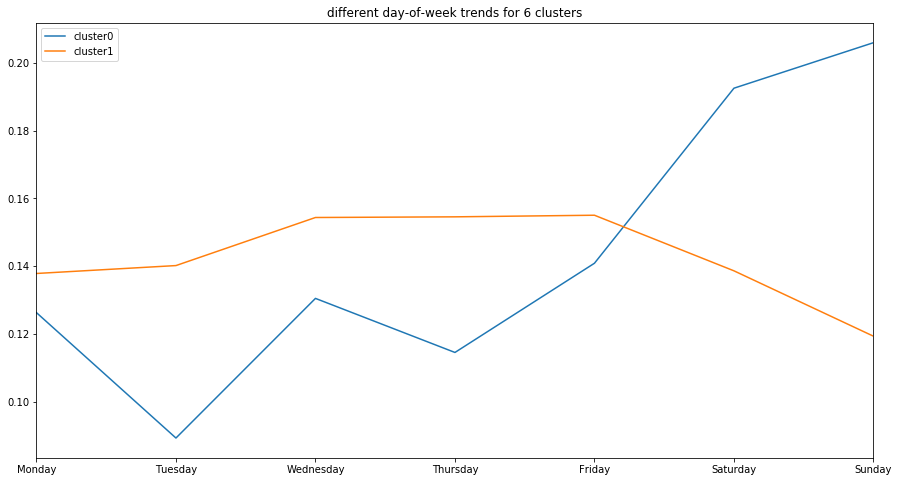

In [67]:
day_mean.T.plot(figsize=[15,8],title='different day-of-week trends for 6 clusters')
plt.show()

In [69]:
weekday[weekday['labels'] == 0]

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,labels
ASSAULT 3 & RELATED OFFENSES,0.135523,0.105548,0.128827,0.128508,0.141582,0.162309,0.197704,0
INTOXICATED & IMPAIRED DRIVING,0.106628,0.051873,0.109510,0.089337,0.158501,0.247839,0.236311,0
FELONY ASSAULT,0.136761,0.110503,0.153173,0.125821,0.122538,0.167396,0.183807,0


In [70]:
weekday[weekday['labels'] == 1]

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,labels
PETIT LARCENY,0.142461,0.143440,0.154537,0.137076,0.153557,0.140992,0.127937,1
GRAND LARCENY,0.147412,0.146998,0.148654,0.135818,0.153623,0.144928,0.122567,1
CRIMINAL MISCHIEF & RELATED OF,0.131808,0.128621,0.149768,0.129200,0.148320,0.162804,0.149479,1
HARRASSMENT 2,0.142354,0.142824,0.142354,0.144468,0.142589,0.130843,0.154569,1
CRIMINAL TRESPASS,0.133333,0.168889,0.164444,0.168889,0.120000,0.128889,0.115556,1
BURGLARY,0.144913,0.137718,0.157246,0.138746,0.175745,0.139774,0.105858,1
OFF. AGNST PUB ORD SENSBLTY &,0.145078,0.123316,0.153368,0.159585,0.159585,0.129534,0.129534,1
ROBBERY,0.141615,0.132919,0.166460,0.119255,0.152795,0.152795,0.134161,1
GRAND LARCENY OF MOTOR VEHICLE,0.130435,0.143667,0.132325,0.145558,0.172023,0.143667,0.132325,1
VEHICLE AND TRAFFIC LAWS,0.139211,0.134571,0.113689,0.187935,0.150812,0.136891,0.136891,1
